Iteration 1: Best Distance = 2.212389412328018
Iteration 2: Best Distance = 2.2123894123280174
Iteration 3: Best Distance = 2.2123894123280174
Iteration 4: Best Distance = 2.2123894123280174
Iteration 5: Best Distance = 2.2123894123280174
Iteration 6: Best Distance = 2.2123894123280174
Iteration 7: Best Distance = 2.2123894123280174
Iteration 8: Best Distance = 2.2123894123280174
Iteration 9: Best Distance = 2.2123894123280174
Iteration 10: Best Distance = 2.2123894123280174
Iteration 11: Best Distance = 2.2123894123280174
Iteration 12: Best Distance = 2.2123894123280174
Iteration 13: Best Distance = 2.2123894123280174
Iteration 14: Best Distance = 2.2123894123280174
Iteration 15: Best Distance = 2.2123894123280174
Iteration 16: Best Distance = 2.2123894123280174
Iteration 17: Best Distance = 2.2123894123280174
Iteration 18: Best Distance = 2.2123894123280174
Iteration 19: Best Distance = 2.2123894123280174
Iteration 20: Best Distance = 2.2123894123280174
Iteration 21: Best Distance = 

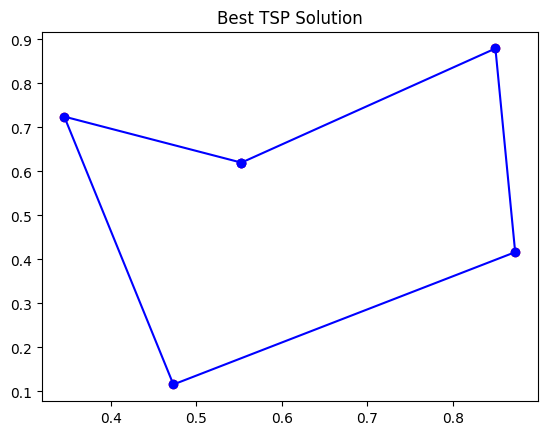

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Calculate the Euclidean distance between two cities
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

# Calculate the total distance of a tour (path)
def total_distance(tour, cities):
    dist = 0
    for i in range(len(tour) - 1):
        dist += distance(cities[tour[i]], cities[tour[i + 1]])
    dist += distance(cities[tour[-1]], cities[tour[0]])  # Return to the starting city
    return dist

# Cuckoo Search algorithm for TSP
def cuckoo_search(cities, num_nests, num_iterations, pa=0.25):
    n = len(cities)
    # Initialize the nests with random tours (permutations)
    nests = [np.random.permutation(n) for _ in range(num_nests)]
    fitness = [total_distance(nest, cities) for nest in nests]
    best_nest = nests[np.argmin(fitness)]
    best_fitness = min(fitness)

    # Main loop for cuckoo search
    for iteration in range(num_iterations):
        # Generate new nests by Lévy flights
        new_nests = []
        for i in range(num_nests):
            # Lévy flight: Perturbation of current solution (random walk)
            step_size = np.random.randn(n) * (np.abs(np.random.randn(n)) ** (1 / 3))  # Lévy flight

            new_nest = np.copy(nests[i])
            # Perform Lévy flight perturbation to modify the tour (wrap indices correctly)
            new_nest = np.argsort(new_nest + step_size).astype(int) % n  # Wrap around to valid indices

            new_nests.append(new_nest)

        # Evaluate the new nests
        new_fitness = [total_distance(nest, cities) for nest in new_nests]

        # Replace the worst nests with the new ones if the new nests are better
        for i in range(num_nests):
            if new_fitness[i] < fitness[i]:
                nests[i] = new_nests[i]
                fitness[i] = new_fitness[i]

        # Find the best nest so far
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_nest = nests[min_fitness_idx]

        # Discovery probability: randomly replace some nests with new ones
        for i in range(num_nests):
            if random.random() < pa:
                nests[i] = np.random.permutation(n)
                fitness[i] = total_distance(nests[i], cities)

        print(f"Iteration {iteration+1}: Best Distance = {best_fitness}")

    return best_nest, best_fitness

# Generate random cities for the TSP (coordinates)
def generate_random_cities(num_cities):
    cities = np.random.rand(num_cities, 2)  # Random x, y coordinates
    return cities

# Visualize the best solution
def plot_tour(cities, best_tour):
    tour_cities = cities[best_tour]
    tour_cities = np.vstack([tour_cities, tour_cities[0]])  # Add the first city at the end to complete the loop
    plt.plot(tour_cities[:, 0], tour_cities[:, 1], 'b-o')
    plt.scatter(cities[:, 0], cities[:, 1], color='r')
    plt.title("Best TSP Solution")
    plt.show()

# Main function to run the TSP with Cuckoo Search
if __name__ == "__main__":
    num_cities = 5
    num_nests = 20
    num_iterations = 70

    # Generate random cities
    cities = generate_random_cities(num_cities)

    # Run the cuckoo search algorithm
    best_tour, best_distance = cuckoo_search(cities, num_nests, num_iterations)
    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    # Visualize the best tour
    plot_tour(cities, best_tour)
